# Praktek TF-IDF

**Restu Lestari Mulianingrum (A11.2022.14668)**

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
dataset = pd.read_csv('clean_dataset_stem.csv',sep=';')

In [3]:
dataset.shape

(35437, 10)

In [4]:
dataset.head(10)

,Unnamed: 0.1,Unnamed: 0,content,sentimen,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,1,Dana mmg keren mantap.,POSITIVE,dana mmg keren mantap,"['dana', 'mmg', 'keren', 'mantap']","['dana', 'memang', 'keren', 'mantap']",dana memang keren mantap,dana memang keren mantap,dana memang keren mantap
1,1,2,Saya ngajuin upgrade dana premium krna ktp say...,NEGATIVE,saya ngajuin upgrade dana premium krna ktp say...,"['saya', 'ngajuin', 'upgrade', 'dana', 'premiu...","['saya', 'mengajukan', 'upgrade', 'dana', 'pre...",saya mengajukan upgrade dana premium karena kt...,saya mengajukan upgrade dana premium karena kt...,aju upgrade dana premium ktp buram jadi bisa v...
2,2,3,Kocak mana diskon nya ml malah eror segala kag...,NEGATIVE,kocak mana diskon nya ml malah eror segala kag...,"['kocak', 'mana', 'diskon', 'nya', 'ml', 'mala...","['kocak', 'mana', 'diskon', 'nya', 'mobile leg...",kocak mana diskon nya mobile legends malah ero...,kocak mana diskon nya mobile legends malah ero...,kocak mana diskon mobile legends malah eror se...
3,3,4,Saldo hilang karena no lama Hilang ganti no sa...,NEGATIVE,saldo hilang karena no lama hilang ganti no sa...,"['saldo', 'hilang', 'karena', 'no', 'lama', 'h...","['saldo', 'hilang', 'karena', 'no', 'lama', 'h...",saldo hilang karena no lama hilang ganti no sa...,saldo hilang karena no lama hilang ganti no sa...,saldo hilang no lama hilang ganti no saldo sam...
4,4,6,Udah gua hapus dana ya. ilang ya udah 1 juta l...,NEGATIVE,udah gua hapus dana ya ilang ya udah juta le...,"['udah', 'gua', 'hapus', 'dana', 'ya', 'ilang'...","['sudah', 'saya', 'hapus', 'dana', 'iya', 'hil...",sudah saya hapus dana iya hilang iya sudah jut...,sudah saya hapus dana iya hilang iya sudah jut...,hapus dana iya hilang iya juta lebih duwit say...
5,5,8,TOLONG UNTUK SISTEM KEAMANAN DI PERBAIKI. KALA...,NEUTRAL,tolong untuk sistem keamanan di perbaiki kalau...,"['tolong', 'untuk', 'sistem', 'keamanan', 'di'...","['tolong', 'untuk', 'sistem', 'keamanan', 'di'...",tolong untuk sistem keamanan di perbaiki kalau...,tolong untuk sistem keamanan di perbaiki kalau...,untuk sistem aman baik kalau orang ke hack waj...
6,6,9,mempermudah transfer,POSITIVE,mempermudah transfer,"['mempermudah', 'transfer']","['mempermudah', 'transfer']",mempermudah transfer,mempermudah transfer,mudah transfer
7,7,10,baru yobain semoga aman sentosa tidak pembobol...,NEUTRAL,baru yobain semoga aman sentosa tidak pembobol...,"['baru', 'yobain', 'semoga', 'aman', 'sentosa'...","['baru', 'mencoba', 'semoga', 'aman', 'sentosa...",baru mencoba semoga aman sentosa tidak pembobo...,baru mencoba semoga aman sentosa tidak pembobo...,baru coba moga aman sentosa bobol apk belah
8,8,11,kok gx bisa keridit,NEGATIVE,kok gx bisa keridit,"['kok', 'gx', 'bisa', 'keridit']","['kok', 'gak', 'bisa', 'keridit']",kok gak bisa keridit,kok gak bisa keridit,kok gak keridit
9,9,12,sangat puas,POSITIVE,sangat puas,"['sangat', 'puas']","['sangat', 'puas']",sangat puas,sangat puas,sangat puas


In [5]:
dataset_feature=dataset['content'].astype(str)

In [6]:
dataset_feature

0                                   Dana mmg keren mantap.
1        Saya ngajuin upgrade dana premium krna ktp say...
2        Kocak mana diskon nya ml malah eror segala kag...
3        Saldo hilang karena no lama Hilang ganti no sa...
4        Udah gua hapus dana ya. ilang ya udah 1 juta l...
                               ...                        
35432    Amanah, biasanya kerja juga pake apk dana buat...
35433    Kak tolong perbaiki dana saya, Karena tidak mu...
35434                              error, tidak bisa masuk
35435                                       Cukup membantu
35436    tolong pihak dana knp saldo saya hilang,ada yg...
Name: content, Length: 35437, dtype: object

In [7]:
dataset

,Unnamed: 0.1,Unnamed: 0,content,sentimen,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,1,Dana mmg keren mantap.,POSITIVE,dana mmg keren mantap,"['dana', 'mmg', 'keren', 'mantap']","['dana', 'memang', 'keren', 'mantap']",dana memang keren mantap,dana memang keren mantap,dana memang keren mantap
1,1,2,Saya ngajuin upgrade dana premium krna ktp say...,NEGATIVE,saya ngajuin upgrade dana premium krna ktp say...,"['saya', 'ngajuin', 'upgrade', 'dana', 'premiu...","['saya', 'mengajukan', 'upgrade', 'dana', 'pre...",saya mengajukan upgrade dana premium karena kt...,saya mengajukan upgrade dana premium karena kt...,aju upgrade dana premium ktp buram jadi bisa v...
2,2,3,Kocak mana diskon nya ml malah eror segala kag...,NEGATIVE,kocak mana diskon nya ml malah eror segala kag...,"['kocak', 'mana', 'diskon', 'nya', 'ml', 'mala...","['kocak', 'mana', 'diskon', 'nya', 'mobile leg...",kocak mana diskon nya mobile legends malah ero...,kocak mana diskon nya mobile legends malah ero...,kocak mana diskon mobile legends malah eror se...
3,3,4,Saldo hilang karena no lama Hilang ganti no sa...,NEGATIVE,saldo hilang karena no lama hilang ganti no sa...,"['saldo', 'hilang', 'karena', 'no', 'lama', 'h...","['saldo', 'hilang', 'karena', 'no', 'lama', 'h...",saldo hilang karena no lama hilang ganti no sa...,saldo hilang karena no lama hilang ganti no sa...,saldo hilang no lama hilang ganti no saldo sam...
4,4,6,Udah gua hapus dana ya. ilang ya udah 1 juta l...,NEGATIVE,udah gua hapus dana ya ilang ya udah juta le...,"['udah', 'gua', 'hapus', 'dana', 'ya', 'ilang'...","['sudah', 'saya', 'hapus', 'dana', 'iya', 'hil...",sudah saya hapus dana iya hilang iya sudah jut...,sudah saya hapus dana iya hilang iya sudah jut...,hapus dana iya hilang iya juta lebih duwit say...
...,...,...,...,...,...,...,...,...,...,...
35432,35432,49993,"Amanah, biasanya kerja juga pake apk dana buat...",NEUTRAL,amanah biasanya kerja juga pake apk dana buat ...,"['amanah', 'biasanya', 'kerja', 'juga', 'pake'...","['amanah', 'biasanya', 'kerja', 'juga', 'pakai...",amanah biasanya kerja juga pakai apk dana buat...,amanah biasanya kerja juga pakai apk dana buat...,amanah biasa kerja pakai apk dana buat ngisi u...
35433,35433,49994,"Kak tolong perbaiki dana saya, Karena tidak mu...",NEUTRAL,kak tolong perbaiki dana saya karena tidak mun...,"['kak', 'tolong', 'perbaiki', 'dana', 'saya', ...","['kak', 'tolong', 'perbaiki', 'dana', 'saya', ...",kak tolong perbaiki dana saya karena tidak mun...,kak tolong perbaiki dana saya karena tidak mun...,kak baik dana karena muncul dana paylater
35434,35434,49996,"error, tidak bisa masuk",NEGATIVE,error tidak bisa masuk,"['error', 'tidak', 'bisa', 'masuk']","['error', 'tidak', 'bisa', 'masuk']",error tidak bisa masuk,error tidak bisa masuk,error bisa masuk
35435,35435,49997,Cukup membantu,POSITIVE,cukup membantu,"['cukup', 'membantu']","['cukup', 'membantu']",cukup membantu,cukup membantu,cukup bantu


In [8]:
dataset_label = dataset['sentimen']
dataset_label

0        POSITIVE
1        NEGATIVE
2        NEGATIVE
3        NEGATIVE
4        NEGATIVE
           ...   
35432     NEUTRAL
35433     NEUTRAL
35434    NEGATIVE
35435    POSITIVE
35436     NEUTRAL
Name: sentimen, Length: 35437, dtype: object

In [9]:
# Encoding
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
encoded_labels = label_encoder.fit_transform(dataset_label)

# Print the encoded labels
print(encoded_labels)

[2 0 0 ... 0 2 1]


## Cek Distribusi Score

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\RESTU\AppData\Local\Temp\ipykernel_33832\421850249.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(encoded_labels_series, label=f'target, skew: {encoded_labels_series.skew():.2f}')


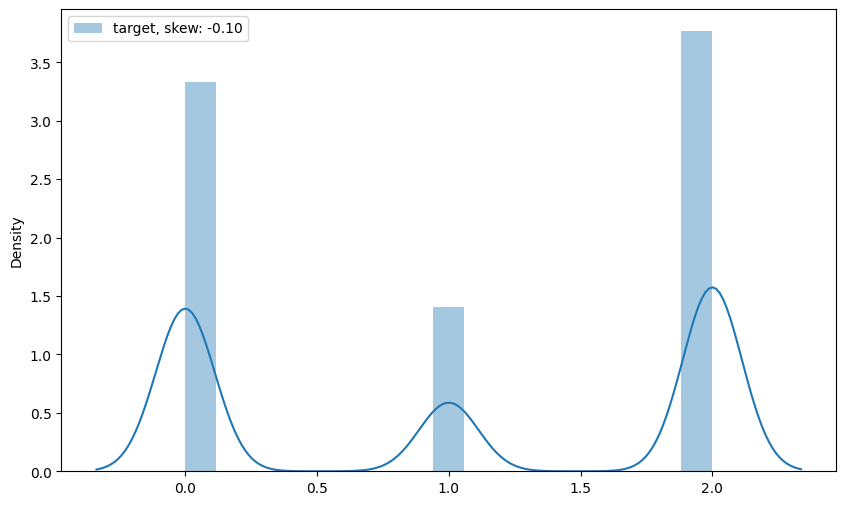

In [11]:
# Convert encoded_labels (NumPy array) back to pandas Series
encoded_labels_series = pd.Series(encoded_labels)

# Visualize the target variable
plt.figure(figsize=(10, 6))
sns.distplot(encoded_labels_series, label=f'target, skew: {encoded_labels_series.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [12]:
dataset_label.value_counts()

sentimen
POSITIVE    15699
NEGATIVE    13884
NEUTRAL      5854
Name: count, dtype: int64

## TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
vectorizer = TfidfVectorizer()

In [15]:
X = vectorizer.fit_transform(dataset_feature)

In [16]:
print(X.shape)

(35437, 17711)


In [17]:
features = vectorizer.get_feature_names_out()

In [18]:
features

array(['00', '000', '0000', ..., '𝑡𝑟𝑎𝑛𝑠𝑎𝑘𝑠𝑖', '𝑡𝑟𝑚𝑘𝑠ℎ', '𝑢𝑛𝑠𝑢𝑟'],
      dtype=object)

In [19]:
idfValues = vectorizer.idf_

In [20]:
d = dict(zip(features, 9 - idfValues))

In [21]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [22]:
for i in range(3867):
    print(sortedDict[i])

('dana', 6.80049450545353)
('sangat', 6.538907165434119)
('saya', 6.367208946578085)
('di', 6.349579000627046)
('bisa', 6.297844627058633)
('aplikasi', 5.920389134205184)
('dan', 5.888968134032575)
('tidak', 5.88101487573541)
('ada', 5.814752621506301)
('ini', 5.8099733393617266)
('nya', 5.785469816305813)
('membantu', 5.725845985520594)
('bagus', 5.704500753772146)
('ke', 5.596615338470235)
('saldo', 5.585631389972907)
('mau', 5.423242387252294)
('uang', 5.3846450877541505)
('transaksi', 5.378453117506229)
('akun', 5.315982849432718)
('gak', 5.302252656620816)
('sudah', 5.2827934977728965)
('masuk', 5.253755704592466)
('tapi', 5.22248920055479)
('ga', 5.184574349455914)
('tolong', 5.176530776398467)
('padahal', 5.147613098758887)
('yg', 5.1397583701078)
('yang', 5.096448479659426)
('lagi', 5.085061193050542)
('kenapa', 5.076697317842786)
('apk', 5.034343091436899)
('untuk', 5.002064273479574)
('aja', 5.000365999649382)
('mudah', 4.974539600089484)
('udah', 4.973376132826186)
('sekali'

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [24]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

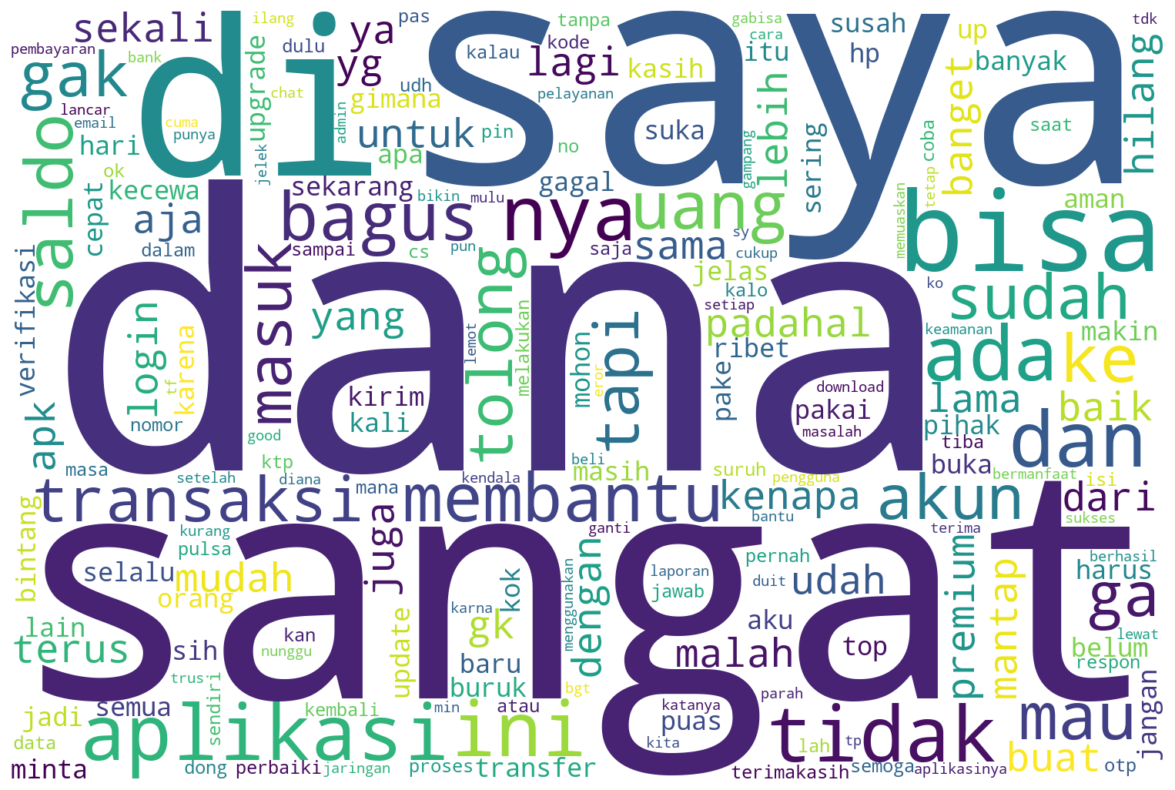

In [25]:
PlotWordCloud(d)